<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Clasificacion-Lineal/blob/main/1_Matriz_de_Indicadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Lo primero que veremos será inspeccionar como funcionan las matrices de indicadores y como sacarles provecho.

Empezamos utilizando el data set clásico de [Iris](https://gist.github.com/curran/a08a1080b88344b0c8a7). En este, clasificamos tres tipos de flores: setosa, versicolor y virginca. Los features son los siguientes:

* *sepal_length*: longitud del sépalo.	
* *sepal_width*: anchura del sépalo.	
* *petal_length*: longitud del pétalo.	
* *petal_width*: anchura del sépalo.

Las librerías que utilizamos son:

* **Numpy** que tiene precargadas funciones para manejar vectores y matrices.
* **Pandas** que nos permite trabajar con matrices como tablas.
* **Seaborn** y **Matplotlib** para visualizar datos.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Empezamos abriendo el data set con la función *load_dataset* para visualizar nuestro data frame.

In [ ]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Con la función *describe* podemos ver la información estadística básica.

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Antes de pasar a las matrices, podemos usar la función *vale_counts* podemos contar cuantas flores hay en cada categoria.

In [ ]:
df["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# Creando una Matriz de Indicadores

Para poder crear una matriz de indicadores, lo único que tenemos que hacer es utilizar la función *get_dummies* y seleccionar la columna que queremos transformar en binario.

A este proceso lo conocemos como *one hot encoding*.

Hay que recordar que no lo estamos transformando en valores ordinales porque no hay relación relación ordinal entre los tipos de flores.

In [ ]:
df = pd.get_dummies(data=df, columns=["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# Evaluando la Clasificación Linear

Finalmente, podemos crear una línea de mejor ajuste para dividir a nuestros datos. En este caso, vemos tanto la longitud del sépalo como del pétalo para categorizar si pertenecen a virginica que es el valor 1 de la gráfica.

Como podemos ver, no es la forma más eficiente. Por ello tendremos que usar una función sigmoide que veremos en el siguienet apunte.

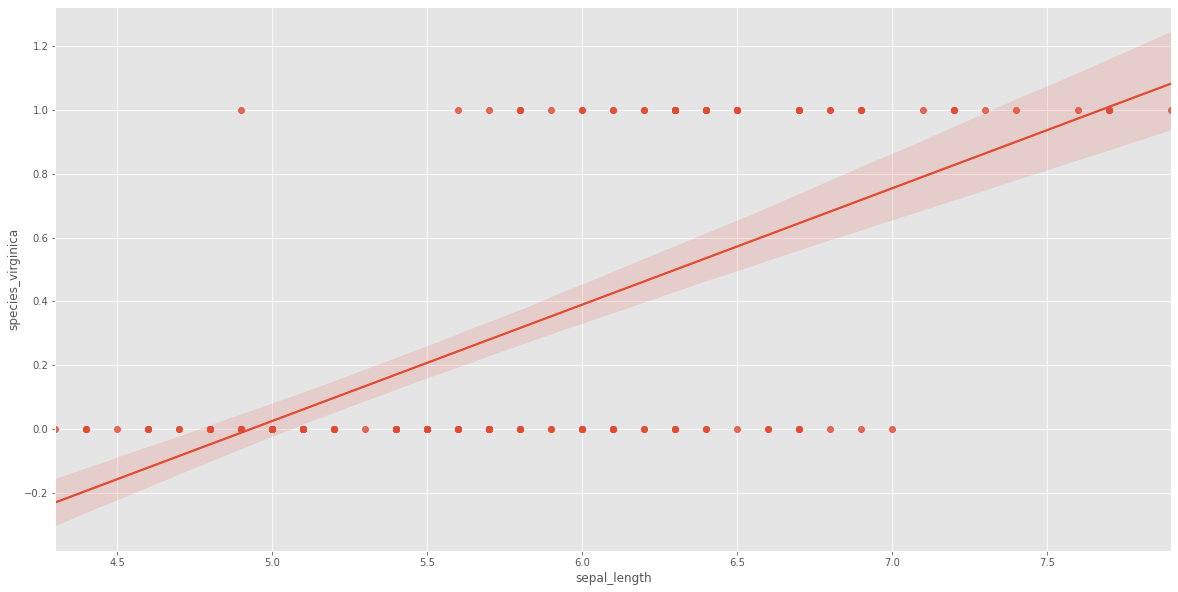

In [ ]:
sns.regplot(x="sepal_length", y="species_virginica", data=df)

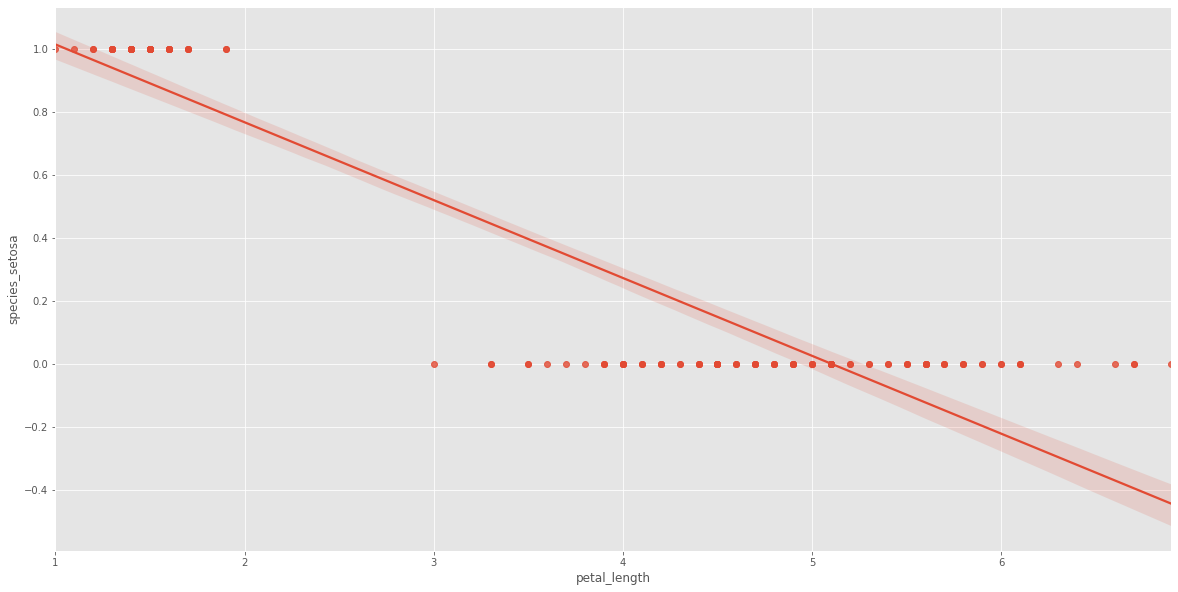

In [ ]:
sns.regplot(x="petal_length", y="species_setosa", data=df)